<a href="https://colab.research.google.com/github/omarreess/DLI-Internship-Data-Science/blob/main/Session%205%20Assignment%20-%20Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Pandas

# `Series`

In [1]:
# Create the following series with pandas and print it
#Cat       10
#Dog       20
#Rat       30
#Bird      40

import pandas as pd
series1 = pd.Series([10, 20, 30, 40] ,index = ["Cat" , "Dog" , "Rat" , "Bird "] )
print(series1)  #insert Col , indexs



Cat      10
Dog      20
Rat      30
Bird     40
dtype: int64


In [2]:
# Print out the value of the index Rat from the previous series using index location and also using key location

print(f"using index location {series1.iloc[2]}")
print(f"using key location {series1.loc['Rat']}")

using index location 30
using key location 30


In [3]:
# Slice out the indices (keys) that has values > 20

print(f"slice series {series1[series1>20]}")

slice series Rat      30
Bird     40
dtype: int64


last rows in series 0    60
1    70
dtype: int64
broadcasting rows in series 0    110
1    120
dtype: int64


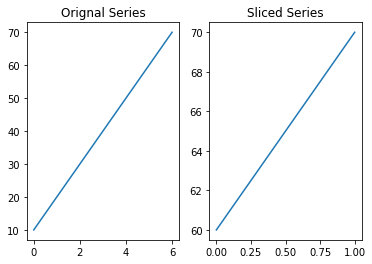

In [4]:
# Slice only the last 2 rows from the below series and reset their index
Series1 = pd.Series([10, 20, 30, 40, 50, 60, 70])
slicedSeries = Series1.tail(2 ).reset_index(drop=True  )
print(f"last rows in series {slicedSeries}") 

# Add 50 to the values of the previous slice you made using broadcast
print(f"broadcasting rows in series {slicedSeries+50}") 


# Plot the Series1 and the slice using subplot  
import matplotlib.pyplot as plt
 

plt.subplot(1, 2, 1)
plt.plot(Series1)
plt.title("Orignal Series")

plt.subplot(1 ,2, 2)
plt.plot(slicedSeries)
plt.title("Sliced Series")
 
plt.show()

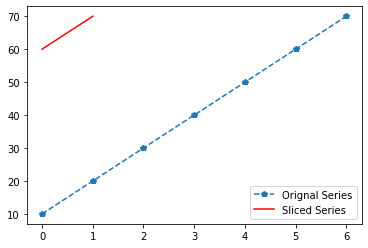

In [5]:
# Plot the Series1 and the slice on the same plot and use different styles, also use a legend and set the labels
plt.plot(Series1, "p--", label="Orignal Series")
plt.plot( slicedSeries, "r-", label="Sliced Series")
plt.legend(loc='lower right' )
plt.show()

# `DataFrame` 

In [6]:
Shapes_dict = {
    "length": pd.Series([15, 15, 25,30], index=["rectangle_1", "square_1", "rectangle_2", "square_2"]),
    "width": pd.Series([10, 20], index=["rectangle_1", "square_2"]),
}
Shapes = pd.DataFrame(Shapes_dict)
Shapes

,length,width
rectangle_1,15,10.0
rectangle_2,25,NaN
square_1,15,NaN
square_2,30,20.0


In [7]:
# Using the previous Dataframe, use eval method to create a new column of the area || Note: area is length * width
Shapes.eval("Area = length * width" , inplace=True )
Shapes

,length,width,Area
rectangle_1,15,10.0,150.0
rectangle_2,25,NaN,NaN
square_1,15,NaN,NaN
square_2,30,20.0,600.0


In [8]:
# Fill the missing values of the previous datafame with 0
Shapes.fillna(value= 0 , inplace=True )
Shapes

,length,width,Area
rectangle_1,15,10.0,150.0
rectangle_2,25,0.0,0.0
square_1,15,0.0,0.0
square_2,30,20.0,600.0


In [9]:
# Add a new column with name over 300 and fill it with True for the indices that has area > 300
Over =pd.Series ([ True if Shapes["Area"][x] >300   else False for x in range (len(Shapes))   ] , index=["rectangle_1", "square_1", "rectangle_2", "square_2"])
# or 
# Over = Shapes.assign(over_300=Shapes["Area"]>300)

Shapes.insert(1 , "Over" ,Over )
Shapes 
  
 



,length,Over,width,Area
rectangle_1,15,False,10.0,150.0
rectangle_2,25,False,0.0,0.0
square_1,15,False,0.0,0.0
square_2,30,True,20.0,600.0


In [10]:
# Get the rows that has length value is more than 20 using boolean indexing
 
Shapes [ Shapes.length > 20]

,length,Over,width,Area
rectangle_2,25,False,0.0,0.0
square_2,30,True,20.0,600.0


In [11]:
# Use query and find indices that has length less than 20
Shapes.query("length<20")


,length,Over,width,Area
rectangle_1,15,False,10.0,150.0
square_1,15,False,0.0,0.0


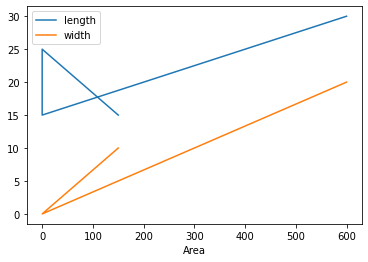

In [12]:
# Plot the dataframe with area on x-axis and  length, width on y-axis
Shapes.plot(x = "Area", y = ["length", "width"])

In [13]:
Shapes_dict = {
    "length": pd.Series([15, 15, 25,30], index=["rectangle_1", "square_1", "rectangle_2", "square_2"]),
    "width": pd.Series([10, 20], index=["rectangle_1", "square_2"]),
}
Shapes = pd.DataFrame(Shapes_dict)
Shapes
  

,length,width
rectangle_1,15,10.0
rectangle_2,25,NaN
square_1,15,NaN
square_2,30,20.0


In [14]:
# Drop NA values using how="any" and another time using how="all"
# any(Shapes)

anyDroppedData = Shapes.dropna(    how = "any"  , inplace=True  )
anyDroppedData

allDroppedData = Shapes .dropna( how = "all")
allDroppedData 

,length,width
rectangle_1,15,10.0
square_2,30,20.0


In [15]:
# Save the dataframe as CSV
shapesCSV=Shapes.to_csv("shapes.csv")



# Loop over the CSV content and print its content line by line
import csv
with open("shapes.csv" ,'r') as fileCSV:
  
  for y in csv.reader(fileCSV ):
   print (y)


['', 'length', 'width']
['rectangle_1', '15', '10.0']
['square_2', '30', '20.0']


In [16]:
# Load your saved csv file with index_col=0 and show the output
pd.read_csv('shapes.csv', index_col=0) 

,length,width
rectangle_1,15,10.0
square_2,30,20.0


In [17]:
# Load your saved csv file WITHOUT index_col=0 and show the output
pd.read_csv('shapes.csv', index_col=None) 

,Unnamed: 0,length,width
0,rectangle_1,15,10.0
1,square_2,30,20.0


In [18]:
city_loc = pd.DataFrame(
    [
        ["CA", "San Francisco", 37.781334, -122.416728],
        ["NY", "New York", 40.705649, -74.008344],
        ["FL", "Miami", 25.791100, -80.320733],
        ["OH", "Cleveland", 41.473508, -81.739791],
        ["UT", "Salt Lake City", 40.755851, -111.896657]
    ], columns=["state", "city", "lat", "lng"])

city_pop = pd.DataFrame(
    [
        [808976, "San Francisco", "California"],
        [8363710, "New York", "New-York"],
        [413201, "Miami", "Florida"],
        [2242193, "Houston", "Texas"]
    ], index=[3,4,5,6], columns=["population", "city", "state"])
city_loc

,state,city,lat,lng
0,CA,San Francisco,37.781334,-122.416728
1,NY,New York,40.705649,-74.008344
2,FL,Miami,25.791100,-80.320733
3,OH,Cleveland,41.473508,-81.739791
4,UT,Salt Lake City,40.755851,-111.896657


In [19]:
city_pop

,population,city,state
3,808976,San Francisco,California
4,8363710,New York,New-York
5,413201,Miami,Florida
6,2242193,Houston,Texas


In [20]:
# Merge the previous dataframes using pd.merge


pd.merge( city_loc  , city_pop  , how='outer' )


,state,city,lat,lng,population
0,CA,San Francisco,37.781334,-122.416728,NaN
1,NY,New York,40.705649,-74.008344,NaN
2,FL,Miami,25.791100,-80.320733,NaN
3,OH,Cleveland,41.473508,-81.739791,NaN
4,UT,Salt Lake City,40.755851,-111.896657,NaN
5,California,San Francisco,NaN,NaN,808976.0
6,New-York,New York,NaN,NaN,8363710.0
7,Florida,Miami,NaN,NaN,413201.0
8,Texas,Houston,NaN,NaN,2242193.0


In [21]:
# Concatenate the previous dataframes using pd.concat horizontally and vertically
#Vertically
pd.concat([city_loc,city_pop])
 
#Horizontally
pd.concat([city_loc,city_pop] , axis = 1)


,state,city,lat,lng,population,city,state
0,CA,San Francisco,37.781334,-122.416728,NaN,NaN,NaN
1,NY,New York,40.705649,-74.008344,NaN,NaN,NaN
2,FL,Miami,25.791100,-80.320733,NaN,NaN,NaN
3,OH,Cleveland,41.473508,-81.739791,808976.0,San Francisco,California
4,UT,Salt Lake City,40.755851,-111.896657,8363710.0,New York,New-York
5,NaN,NaN,NaN,NaN,413201.0,Miami,Florida
6,NaN,NaN,NaN,NaN,2242193.0,Houston,Texas
